In [1]:
import json
import torchvision
import numpy as np
from matplotlib.pyplot import imshow


In [2]:
%matplotlib inline

In [3]:
def get_all_categories(annotations):
    ids = []
    for a in annotations:
        ids.append(a['category_id'])

    return ids


def id_to_class_index(annotations_path):
    index = {}
    with open(annotations_path, 'r') as COCO:
        js = json.loads(COCO.read())
        cats = js['categories']
        print(cats)

        for cat in cats:
            index[cat['id']] = cat['name']

    return index

In [4]:
root_path = '/hpi/fs00/home/nils.strassenburg/datasets/coco/val2017'
annotations = '/hpi/fs00/home/nils.strassenburg/datasets/coco/annotations/instances_val2017.json'

In [5]:
cat_index = id_to_class_index(annotations)
coco_data = torchvision.datasets.CocoDetection(root_path, annotations)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'name': 'cat'}, {'supercategory': 'animal', 'id': 18, 'name': 'dog'}, {'supercategory

In [6]:
def show_image(element):
    img, annot = element
    all_cats = get_all_categories(annot)
    all_cats = set(map(lambda x: cat_index[x], all_cats))
    print('annotations set:\n {}'.format(all_cats))
    imshow(np.asarray(img))

annotations set:
 {'tv', 'refrigerator', 'potted plant', 'chair', 'clock', 'vase', 'person', 'dining table', 'microwave', 'book'}


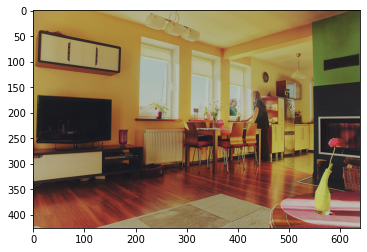

In [7]:
show_image(coco_data[0])

annotations set:
 {'bear'}


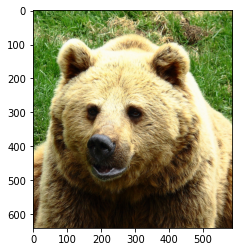

In [8]:
show_image(coco_data[1])
